<a href="https://colab.research.google.com/github/Ashonet/Global_Smoking_Insights/blob/main/Smoking_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install country_converter
!pip install pystan==2.19.1.1
!pip install fbprophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'path/to/your/file.csv'  # Replace this with the path to your CSV file
file_path = '/smoking_rates/share-deaths-smoking.csv'

# Get unique countries in the dataset
countries = data['Entity'].unique()

# Create a single plot for all countries
plt.figure(figsize=(12, 8))  # Adjust figure size if needed

# Plot line graph for each country
for country in countries:
    country_data = data[data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Share of total deaths that are from all causes attributed to smoking, in both sexes aged age-standardized'], label=country)

# Set plot labels and title
plt.title('Share of Total Deaths Attributed to Smoking (Age-Standardized) by Country')
plt.xlabel('Year')
plt.ylabel('Share of Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot with all countries' data
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = '/smoking_rates/share-deaths-smoking.csv'
data = pd.read_csv(file_path)

# Get unique entities that end with ')'
filtered_entities = data[data['Entity'].str.endswith(')')]['Entity'].unique()

# Create a single plot for filtered entities
plt.figure(figsize=(12, 8))

# Plot line graph for each filtered entity
for entity in filtered_entities:
    entity_data = data[data['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Share of total deaths that are from all causes attributed to smoking, in both sexes aged age-standardized'], label=entity)

# Set plot labels and title
plt.title('Share of Total Deaths Attributed to Smoking (Age-Standardized) for Entities Ending with )')
plt.xlabel('Year')
plt.ylabel('Share of Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot with filtered entities' data
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

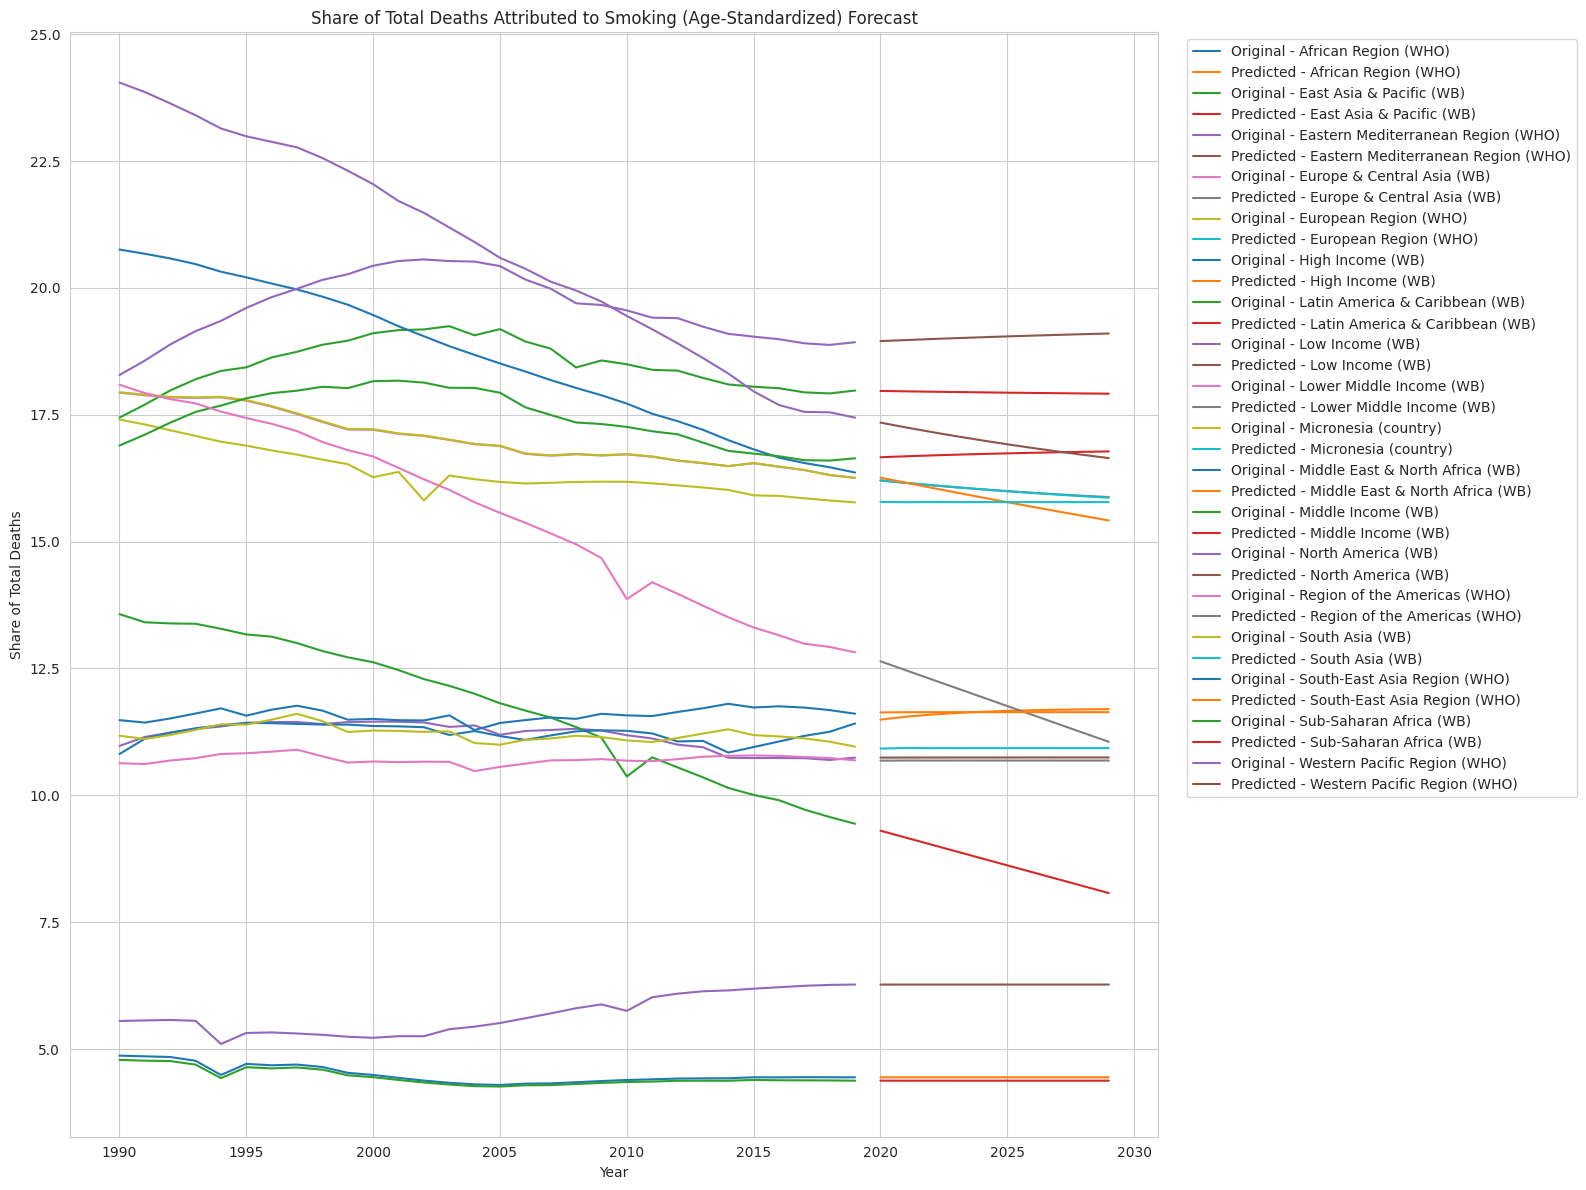

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Read the CSV file
file_path = '/smoking_rates/share-deaths-smoking.csv'
data = pd.read_csv(file_path)

# Get unique entities that end with ')'
filtered_entities = data[data['Entity'].str.endswith(')')]['Entity'].unique()

# Create a Seaborn style plot
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

# Define a color palette to use for lines
palette = sns.color_palette("husl", n_colors=len(filtered_entities))

for idx, entity in enumerate(filtered_entities):
    entity_data = data[data['Entity'] == entity]
    entity_data = entity_data.set_index('Year')['Share of total deaths that are from all causes attributed to smoking, in both sexes aged age-standardized']

    # Fit ARIMA model
    model = ARIMA(entity_data, order=(1, 1, 1))  # Example order, adjust as needed
    fitted = model.fit()

    # Make predictions for the next n years
    forecast_periods = 10
    predictions = fitted.forecast(steps=forecast_periods)

    # Plot original data
    sns.lineplot(data=entity_data, label=f'Original - {entity}', palette=[palette[idx]])

    # Plot forecasted data for the next n years with the same color pallete
    future_years = range(entity_data.index.max() + 1, entity_data.index.max() + forecast_periods + 1)
    sns.lineplot(x=future_years, y=predictions, label=f'Predicted - {entity}', palette=[palette[idx]])

# Set plot labels and title
plt.title('Share of Total Deaths Attributed to Smoking (Age-Standardized) Forecast')
plt.xlabel('Year')
plt.ylabel('Share of Total Deaths')

# Position the legend outside the plot to avoid overlapping
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Show the plot with original and predicted data for filtered entities
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

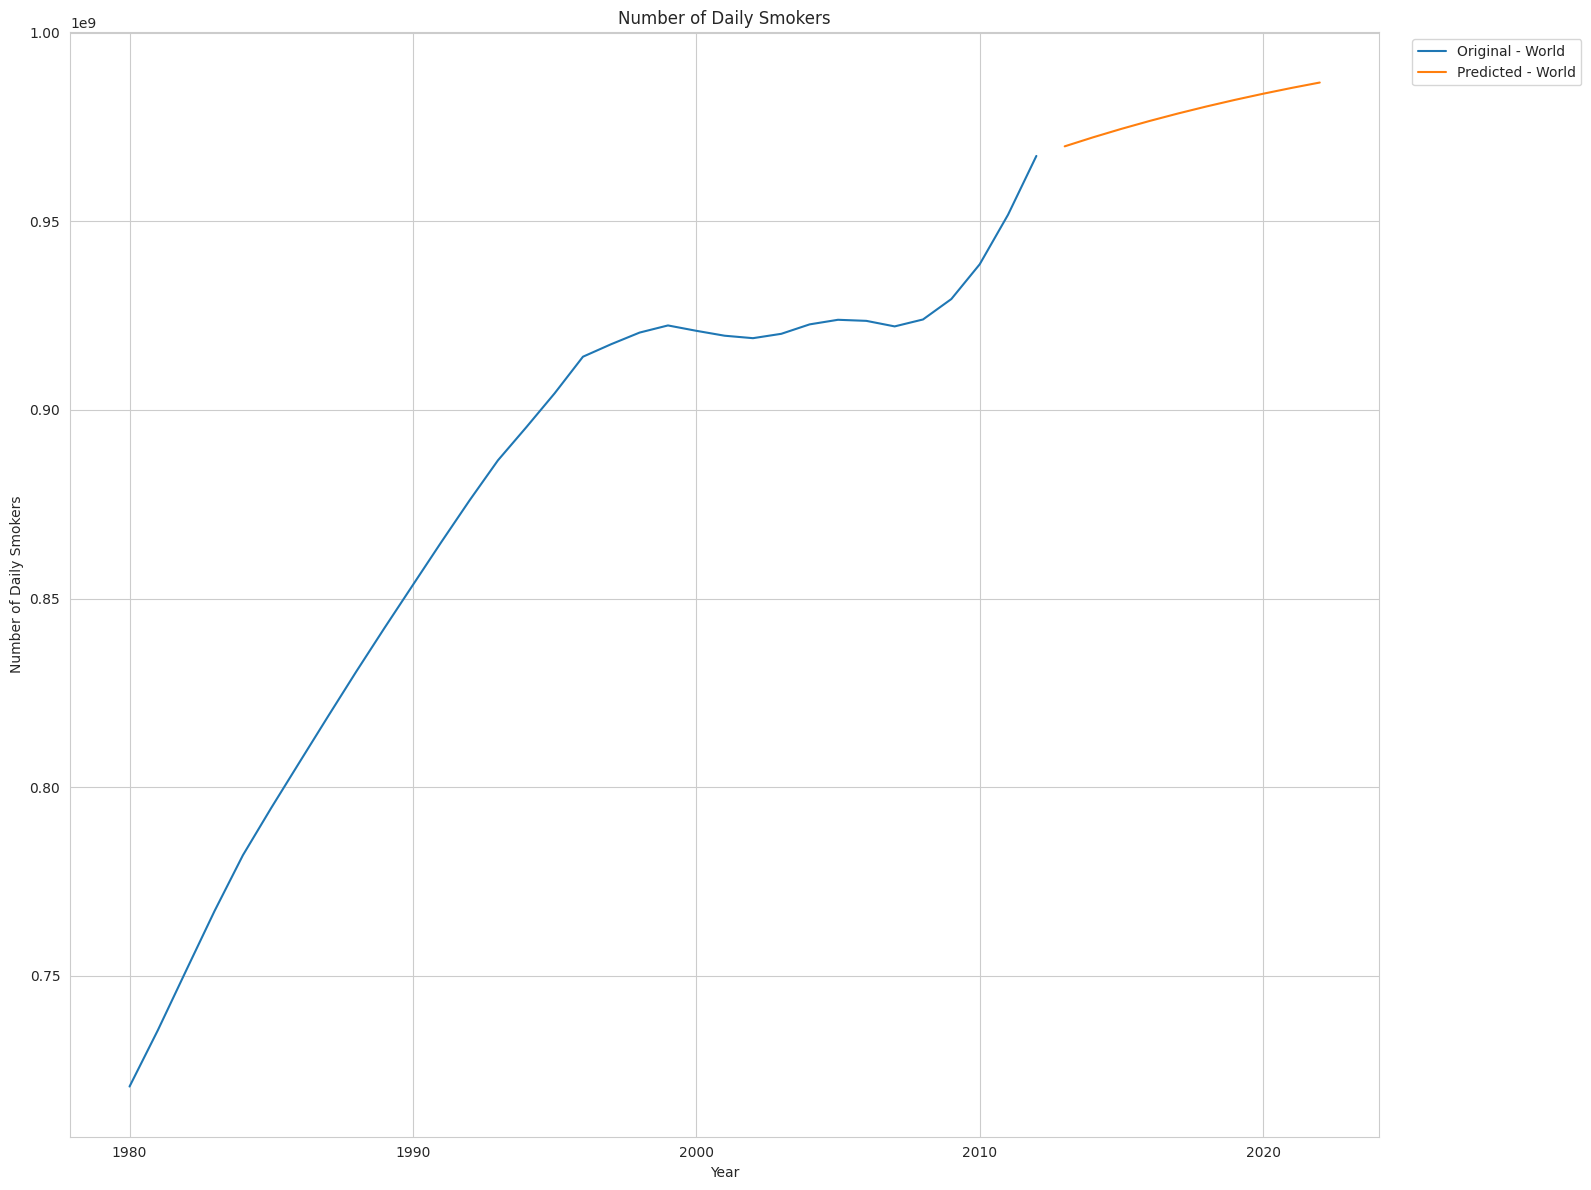

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Read the CSV file
file_path = '/smoking_rates/number-of-total-daily-smokers.csv'
data = pd.read_csv(file_path)

# Get unique entities that end with 'World'
filtered_entities = data[data['Entity'].str.endswith('World')]['Entity'].unique()

# Create a Seaborn style plot
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

# Define a color palette to use for lines
palette = sns.color_palette("husl", n_colors=len(filtered_entities))

for idx, entity in enumerate(filtered_entities):
    entity_data = data[data['Entity'] == entity]
    entity_data = entity_data.set_index('Year')['Number of daily smokers - both (IHME, GHDx (2012))']

    # Fit ARIMA model
    model = ARIMA(entity_data, order=(1, 1, 1))  # Example order, adjust as needed
    fitted = model.fit()

    # Make predictions for the next n years
    forecast_periods = 10
    predictions = fitted.forecast(steps=forecast_periods)

    # Plot original data
    sns.lineplot(data=entity_data, label=f'Original - {entity}', palette=[palette[idx]])

    # Plot forecasted data for the next n years with the same color pallete
    future_years = range(entity_data.index.max() + 1, entity_data.index.max() + forecast_periods + 1)
    sns.lineplot(x=future_years, y=predictions, label=f'Predicted - {entity}', palette=[palette[idx]])

# Set plot labels and title
plt.title('Number of Daily Smokers')
plt.xlabel('Year')
plt.ylabel('Number of Daily Smokers (Billions)')

# Position the legend outside the plot to avoid overlapping
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Show the plot with original and predicted data for filtered entities
plt.show()
